# Import library

In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from skimage import io

In [3]:
from PIL import Image
# from tensorflow.keras.utils import load_img
import keras.utils as image ##!!!

In [4]:
import splitfolders

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [7]:
import cv2

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

--------
# Image Directory

In [9]:
# Download from kaggle
down_angry = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\angry"
down_happy = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\happy"
down_relaxed = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\relaxed"
down_sad = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\sad"

In [10]:
# After filtering images from 16000 to 600
raw_angry = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\angry"
raw_happy = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\happy"
raw_relaxed = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\relaxed"
raw_sad = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\sad"


In [11]:
# After augmenting the images from 600 to 3000
aug_angry = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\angry"
aug_happy = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\happy"
aug_relaxed = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\relaxed"
aug_sad = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\sad"


In [12]:
input_folder = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_aug"
output_folder= r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_tra_tes_val"
train_folder = r"C:/Users/user/Documents/JupyterWork/CMSE890_AML/datasets/dog_images_600/image_tra_tes_val/train/"
validation_folder = "C:/Users/user/Documents/JupyterWork/CMSE890_AML/datasets/dog_images_600/image_tra_tes_val/val/"
test_folder = r"C:/Users/user/Documents/JupyterWork/CMSE890_AML/datasets/dog_images_600/image_tra_tes_val/test/"

-----
#### DO NOT RUN THIS CODE!
# Image Augmentation

In [17]:
# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 

datagen = ImageDataGenerator(
        rotation_range=15,     #Random rotation between 0 and 45
        width_shift_range=0.1,   #% shift
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')    #Also try nearest, constant, reflect, wrap



----
#### DO NOT RUN THIS CODE!
#### Angry

In [18]:
# Angry
image_directory = raw_angry
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [19]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_angry, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

----
#### DO NOT RUN THIS CODE!
#### happy

In [20]:
# happy

image_directory = raw_happy
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [21]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_happy, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

----
#### DO NOT RUN THIS CODE!
#### relaxed

In [22]:
# relaxed

image_directory = raw_relaxed
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [23]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_relaxed, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

----
#### DO NOT RUN THIS CODE!
#### sad

In [24]:
# sad

image_directory = raw_sad
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [25]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_sad, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

---------
#### RUN THE CODE FROM HERE
# 4.1.1. Original Data

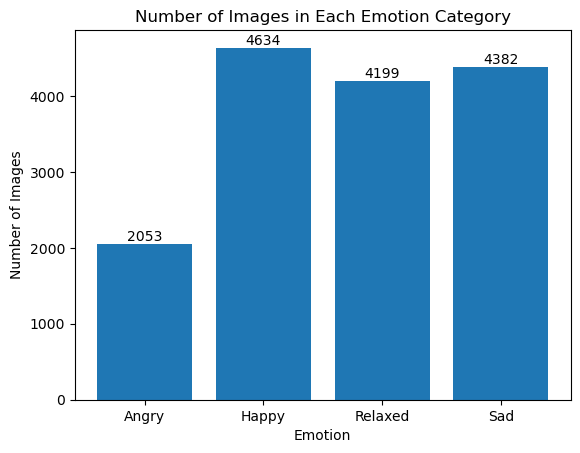

In [13]:
# Count the number of images in each folder
angry_count = len(os.listdir(down_angry))
happy_count = len(os.listdir(down_happy))
relaxed_count = len(os.listdir(down_relaxed))
sad_count = len(os.listdir(down_sad))

# Create a list of the image counts and a list of the folder names
counts = [angry_count, happy_count, relaxed_count, sad_count]
folders = ['Angry', 'Happy', 'Relaxed', 'Sad']

# Create a bar chart
plt.bar(folders, counts)

# Add labels to the x and y axes and a title
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Emotion Category')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

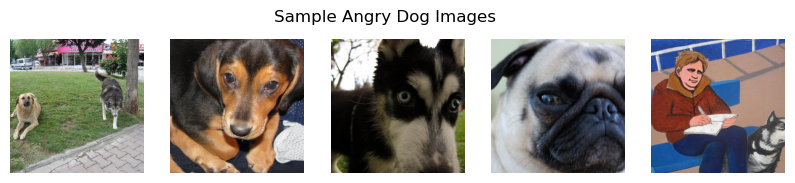

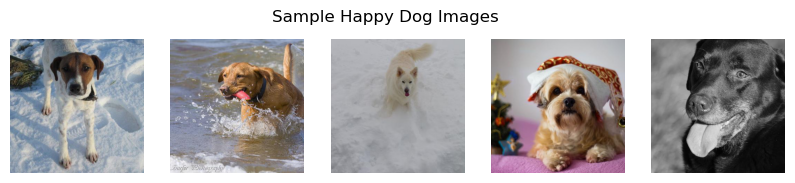

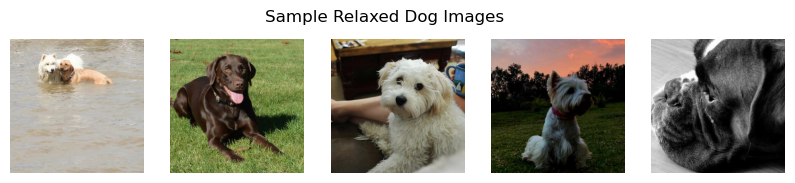

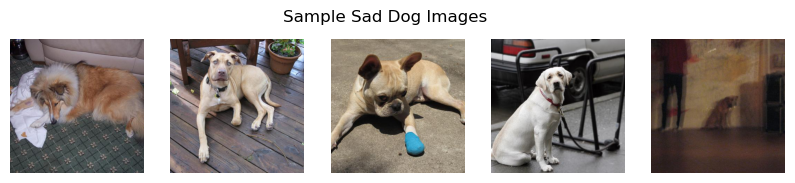

In [14]:
def plot_images(folder_path, title):
  # Get the path to 5 random images
  image_paths = random.sample(os.listdir(folder_path), 5)
  # Load the images
  images = (plt.imread(os.path.join(folder_path, path)) for path in image_paths)
  # Plot the images
  fig, axs = plt.subplots(1, 5, figsize=(10, 2))
  for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis("off")
  plt.suptitle(title)
  plt.show()

plot_images(down_angry, "Sample Angry Dog Images")
plot_images(down_happy, "Sample Happy Dog Images")
plot_images(down_relaxed, "Sample Relaxed Dog Images")
plot_images(down_sad, "Sample Sad Dog Images")

------

# 4.1.2. Cleaned Data

In [15]:
# set the path to your image file
image_path = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\happy\178269085_282c3004f4_b.jpg"

# open the image using PIL's Image module
image = Image.open(image_path)

# check the size and format of the image
print("Image size: ", image.size)
print("Image format: ", image.format)

# check the RGB bands of the image
bands = image.getbands()
if bands == ('R', 'G', 'B'):
    print("Image is RGB")
else:
    print("Image is not RGB")


Image size:  (384, 384)
Image format:  JPEG
Image is RGB


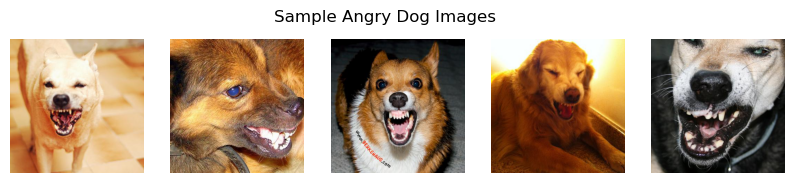

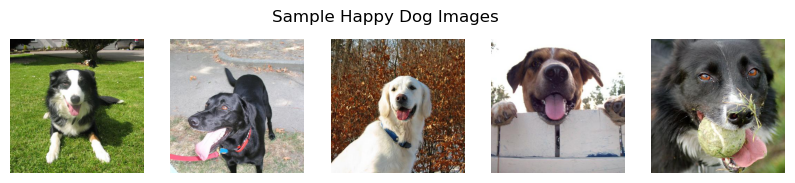

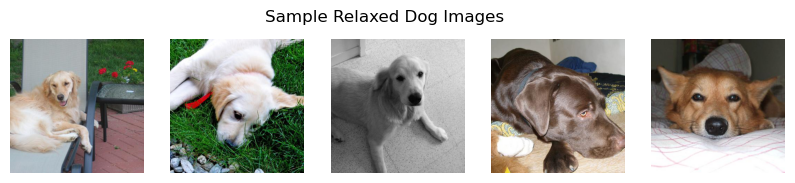

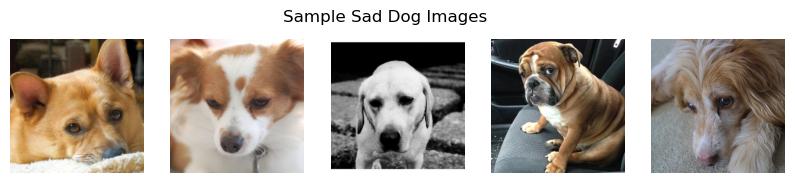

In [16]:
def plot_images(folder_path, title):
  # Get the path to 5 random images
  image_paths = random.sample(os.listdir(folder_path), 5)
  # Load the images
  images = (plt.imread(os.path.join(folder_path, path)) for path in image_paths)
  # Plot the images
  fig, axs = plt.subplots(1, 5, figsize=(10, 2))
  for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis("off")
  plt.suptitle(title)
  plt.show()

plot_images(raw_angry, "Sample Angry Dog Images")
plot_images(raw_happy, "Sample Happy Dog Images")
plot_images(raw_relaxed, "Sample Relaxed Dog Images")
plot_images(raw_sad, "Sample Sad Dog Images")

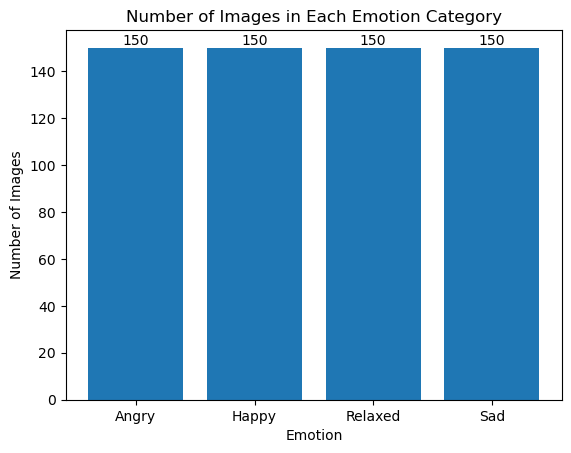

In [17]:
# Count the number of images in each folder
angry_count = len(os.listdir(raw_angry))
happy_count = len(os.listdir(raw_happy))
relaxed_count = len(os.listdir(raw_relaxed))
sad_count = len(os.listdir(raw_sad))

# Create a list of the image counts and a list of the folder names
counts = [angry_count, happy_count, relaxed_count, sad_count]
folders = ['Angry', 'Happy', 'Relaxed', 'Sad']

# Create a bar chart
plt.bar(folders, counts)

# Add labels to the x and y axes and a title
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Emotion Category')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

------
# 4.2.1 Data Augmentation

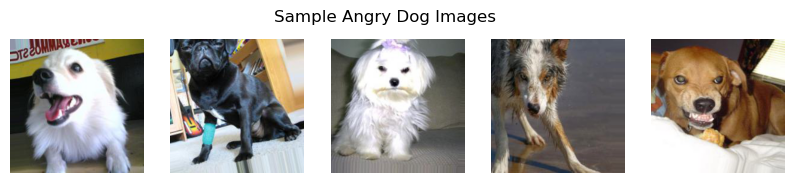

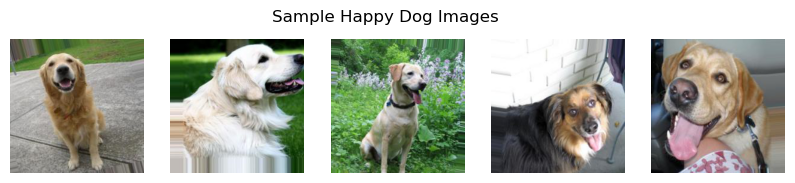

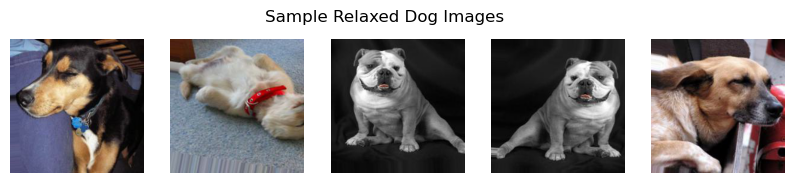

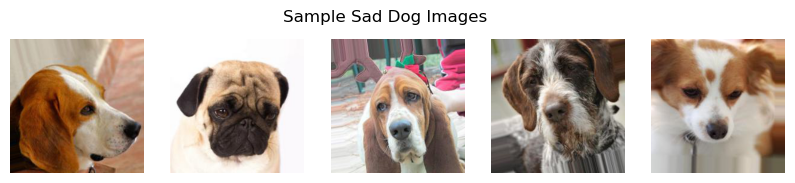

In [18]:
def plot_images(folder_path, title):
  # Get the path to 5 random images
  image_paths = random.sample(os.listdir(folder_path), 5)
  # Load the images
  images = (plt.imread(os.path.join(folder_path, path)) for path in image_paths)
  # Plot the images
  fig, axs = plt.subplots(1, 5, figsize=(10, 2))
  for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis("off")
  plt.suptitle(title)
  plt.show()

plot_images(aug_angry, "Sample Angry Dog Images")
plot_images(aug_happy, "Sample Happy Dog Images")
plot_images(aug_relaxed, "Sample Relaxed Dog Images")
plot_images(aug_sad, "Sample Sad Dog Images")

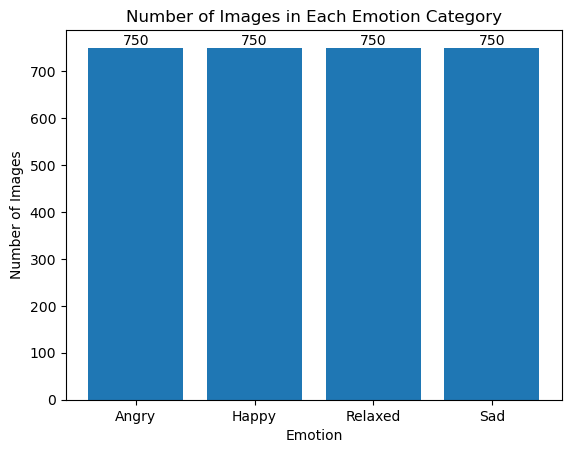

In [19]:
# Count the number of images in each folder
angry_count = len(os.listdir(aug_angry))
happy_count = len(os.listdir(aug_happy))
relaxed_count = len(os.listdir(aug_relaxed))
sad_count = len(os.listdir(aug_sad))

# Create a list of the image counts and a list of the folder names
counts = [angry_count, happy_count, relaxed_count, sad_count]
folders = ['Angry', 'Happy', 'Relaxed', 'Sad']

# Create a bar chart
plt.bar(folders, counts)

# Add labels to the x and y axes and a title
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Emotion Category')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# 4.2.3. Principal Components Analysis

In [20]:
# Create a list of image directories
img_dirs = [aug_angry, aug_happy, aug_relaxed, aug_sad]

# Define the target labels
target_labels = ['0', '1', '2', '3'] # 'angry', 'happy', 'relaxed', 'sad'

pca_n = 16

# Load the images and apply PCA
X = []
y = []

for i, img_dir in enumerate(img_dirs):
    for filename in os.listdir(img_dir):
        img_path = os.path.join(img_dir, filename)
        img = Image.open(img_path)
        img_arr = np.array(img)
        X.append(img_arr.flatten())
        y.append(target_labels[i])

In [21]:
X = np.array(X)
pca = PCA(n_components=pca_n**2)
X_pca = pca.fit_transform(X)

In [22]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance: {explained_variance}")

Explained variance: 0.9065795639737978


In [16]:
# Do not run this code
pca_ns = [100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]
explained_variances = []
for pca_n in pca_ns:
    X = []
    y = []
    for i, img_dir in enumerate(img_dirs):
        for filename in os.listdir(img_dir):
            img_path = os.path.join(img_dir, filename)
            img = Image.open(img_path)
            img_arr = np.array(img)
            X.append(img_arr.flatten())
            y.append(target_labels[i])
    X = np.array(X)
    pca = PCA(n_components=pca_n)
    X_pca = pca.fit_transform(X)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

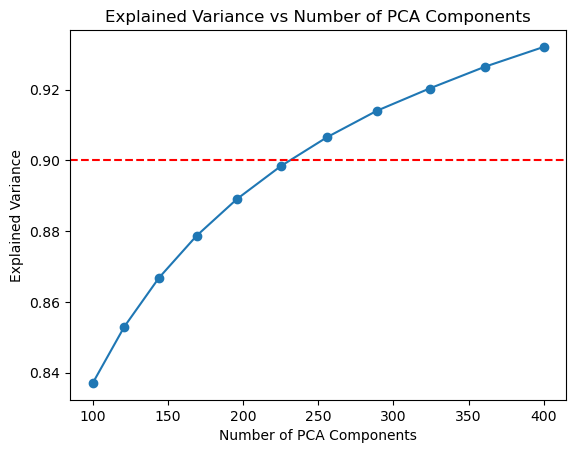

In [17]:
plt.plot(pca_ns, explained_variances, '-o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.show()


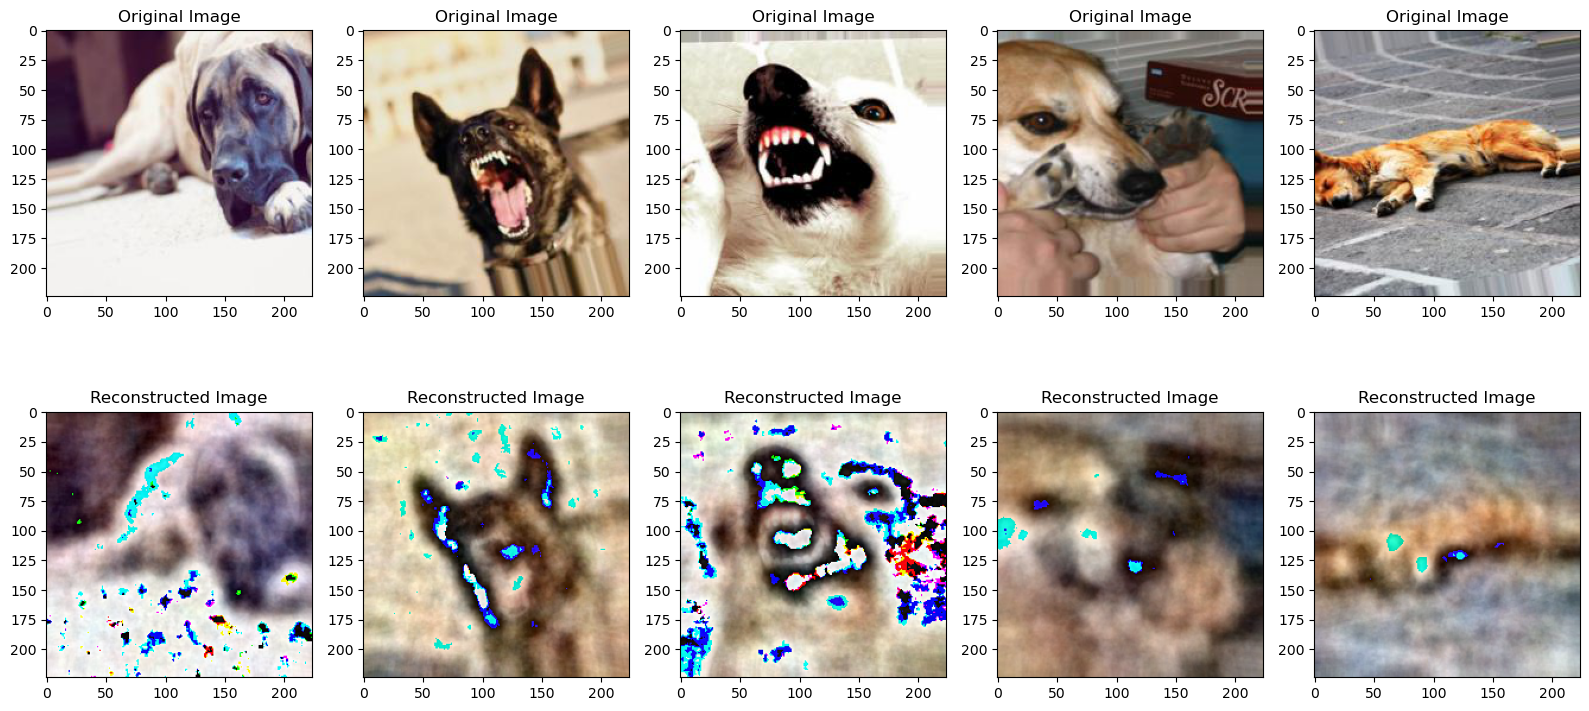

In [23]:
import random

# show 5 random sample images and reconstructed images
fig, axs = plt.subplots(2, 5, figsize=(16, 8))

for i in range(5):
    # randomly select an image
    idx = random.randint(0, len(X)-1)
    
    # show original image
    original_image = X[idx].reshape(224, 224, 3)
    axs[0, i].imshow(original_image)
    axs[0, i].set_title('Original Image')
    
    # show reconstructed image
    reconstructed_images = pca.inverse_transform(X_pca[idx])
    reconstructed_images = reconstructed_images.reshape(224, 224, 3)
    reconstructed_image = Image.fromarray(reconstructed_images.astype('uint8'))
    axs[1, i].imshow(reconstructed_image)
    axs[1, i].set_title('Reconstructed Image')

plt.tight_layout()
plt.show()


# 4.3.1. Train, Validation, and Testing Split (PCA)

In [24]:
# Stack the PCA transformed features and the target labels horizontally
X_pca_with_labels = np.hstack((X_pca, np.array(y)[:, np.newaxis]))

# Split the PCA transformed features and the target labels into X and y arrays
X_with_labels = X_pca_with_labels[:, :-1]
y = X_pca_with_labels[:, -1]

In [25]:
# PCA Train,Val,Test
# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_with_labels, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train set shape: ", X_train.shape, y_train.shape)
print("Validation set shape: ", X_val.shape, y_val.shape)
print("Test set shape: ", X_test.shape, y_test.shape)


Train set shape:  (2100, 256) (2100,)
Validation set shape:  (600, 256) (600,)
Test set shape:  (300, 256) (300,)


In [26]:
X_train_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_pca = pca.transform(X_test.reshape(X_test.shape[0], -1))
X_val_pca = pca.transform(X_val.reshape(X_val.shape[0], -1))

In [27]:
# Reshape the data back into a 3D format for input into a CNN
X_train_pca = X_train_pca.reshape(X_train.shape[0], pca_n, pca_n, 1)
X_test_pca = X_test_pca.reshape(X_test.shape[0], pca_n, pca_n, 1)
X_val_pca = X_val_pca.reshape(X_val.shape[0], pca_n, pca_n, 1)

# 4.3.2.1.2 Hyperparameter Tuning

C:\Users\user\AppData\Local\Temp\ipykernel_12544\842799654.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.234762 using {'batch_size': 64, 'epochs': 50, 'learning_rate': 0.001}


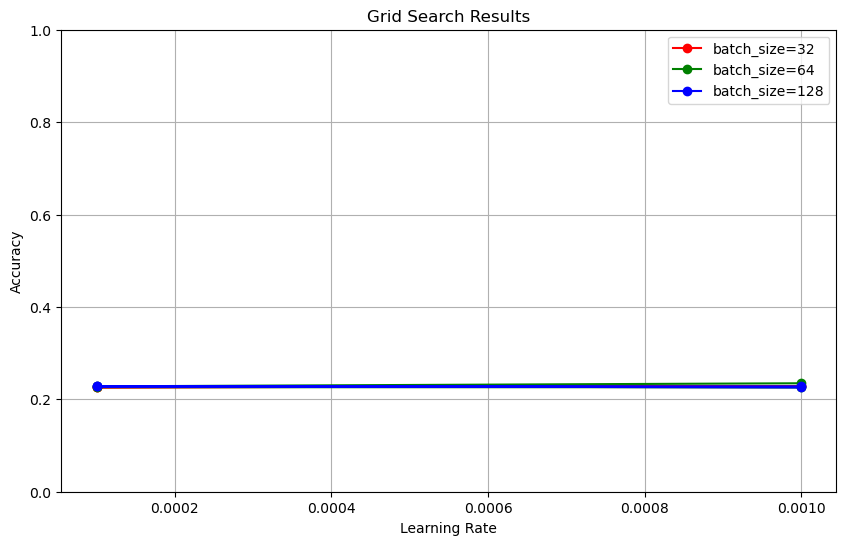

In [62]:
# Do not run it 

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

# Define the function to create the model
def create_model(learning_rate=0.001):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(pca_n, pca_n, 1)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1,activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(num_classes,activation='softmax') 
            ])
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
              'batch_size': [32, 64, 128],
              'epochs': [50, 100],
              'learning_rate': [0.001, 0.0001]
             }

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_result = grid.fit(X_train_pca, y_train_one_hot)

# Print the best parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


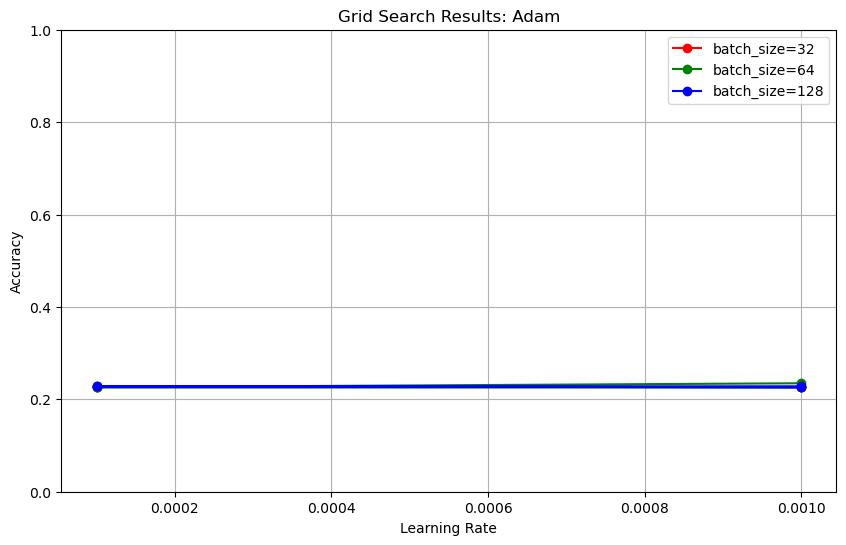

In [64]:
# Do not run it 

# Get the results of the grid search
results = grid_result.cv_results_

# Plot the results
plt.figure(figsize=(10,6))
plt.title("Grid Search Results: Adam")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim([0,1])

for batch_size, color in zip([32, 64, 128], ['r', 'g', 'b']):
    batch_mask = results['param_batch_size'] == batch_size
    epochs = results['param_epochs'][batch_mask]
    lr = results['param_learning_rate'][batch_mask]
    accuracy = results['mean_test_score'][batch_mask]
    label = f'batch_size={batch_size}'
    plt.plot(lr, accuracy, f'{color}o-', label=label)

plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12544\1267266880.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.234762 using {'batch_size': 64, 'epochs': 50, 'learning_rate': 0.001}


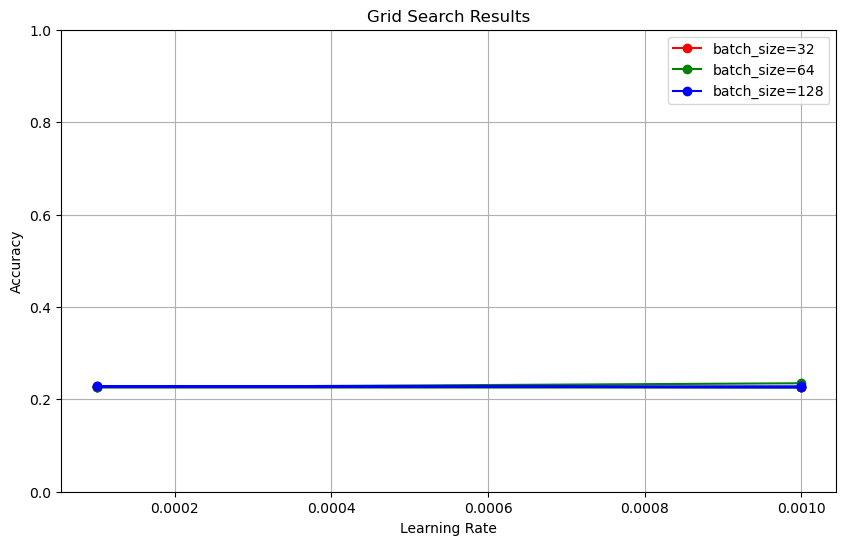

In [63]:
# Do not run it 

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt

# Define the function to create the model
def create_model(learning_rate=0.001):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(pca_n, pca_n, 1)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Dropout(0.1),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1,activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(num_classes,activation='softmax') 
            ])
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
              'batch_size': [32, 64, 128],
              'epochs': [50, 100],
              'learning_rate': [0.001, 0.0001]
             }

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_result = grid.fit(X_train_pca, y_train_one_hot)

# Print the best parameters and score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the results of the grid search
results = grid_result.cv_results_


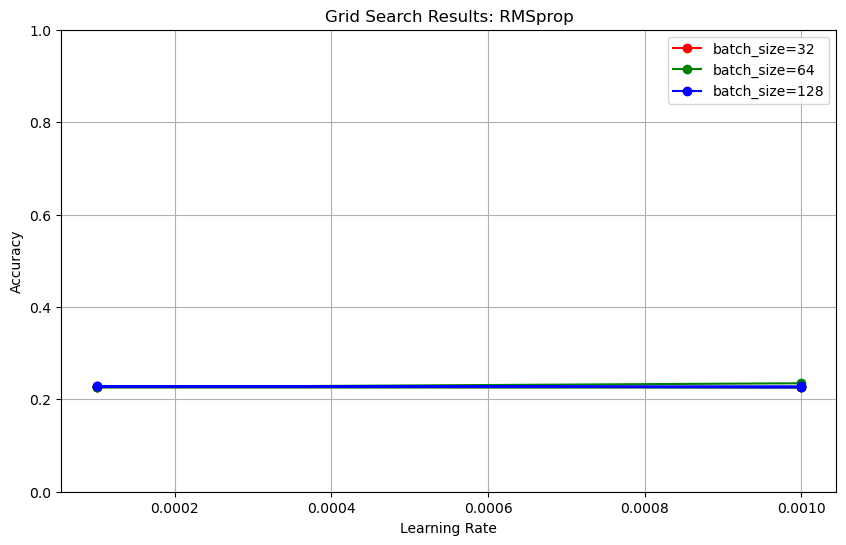

In [65]:
# Do not run it 

# Plot the results
plt.figure(figsize=(10,6))
plt.title("Grid Search Results: RMSprop")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim([0,1])

for batch_size, color in zip([32, 64, 128], ['r', 'g', 'b']):
    batch_mask = results['param_batch_size'] == batch_size
    epochs = results['param_epochs'][batch_mask]
    lr = results['param_learning_rate'][batch_mask]
    accuracy = results['mean_test_score'][batch_mask]
    label = f'batch_size={batch_size}'
    plt.plot(lr, accuracy, f'{color}o-', label=label)

plt.legend()
plt.show()

# 4.3.2.1.3.	Training and Validation

In [28]:
#### Simple CNN
num_classes = 4

model_pca = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(pca_n, pca_n, 1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(1,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    ##
                                    tf.keras.layers.Dense(num_classes,activation='softmax') # num of classes
                                    ])

model_pca.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 64)          0

In [29]:
from tensorflow.keras.optimizers import RMSprop

model_pca.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(learning_rate=0.001),
#              optimizer = 'Adam',
              metrics=['accuracy'])


In [30]:
from keras.utils import to_categorical

# Convert the target tensor to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_val_one_hot = to_categorical(y_val, num_classes=4)


In [31]:
# Train the model using the one-hot encoded target tensor
model_pca_fit = model_pca.fit(x=X_train_pca, 
                      y=y_train_one_hot,
                       batch_size=64, 
                      steps_per_epoch=5,
                      epochs=50, 
                      validation_data=(X_val_pca, y_val_one_hot)
                     )

Epoch 1/50
5/5 [==============================] - 2s 135ms/step - loss: 30.7733 - accuracy: 0.2313 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 0s 35ms/step - loss: 1.3860 - accuracy: 0.2688 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 0s 38ms/step - loss: 1.3862 - accuracy: 0.2688 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 4/50
5/5 [==============================] - 0s 38ms/step - loss: 1.3868 - accuracy: 0.2094 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 5/50
5/5 [==============================] - 0s 36ms/step - loss: 1.3863 - accuracy: 0.2656 - val_loss: 1.3865 - val_accuracy: 0.2133
Epoch 6/50
5/5 [==============================] - 0s 37ms/step - loss: 1.3865 - accuracy: 0.2656 - val_loss: 1.3865 - val_accuracy: 0.2133
Epoch 7/50
5/5 [==============================] - 0s 36ms/step - loss: 1.3856 - accuracy: 0.3182 - val_loss: 1.3869 - val_accuracy: 0.2133
Epoch 8/50
5/5 [=========

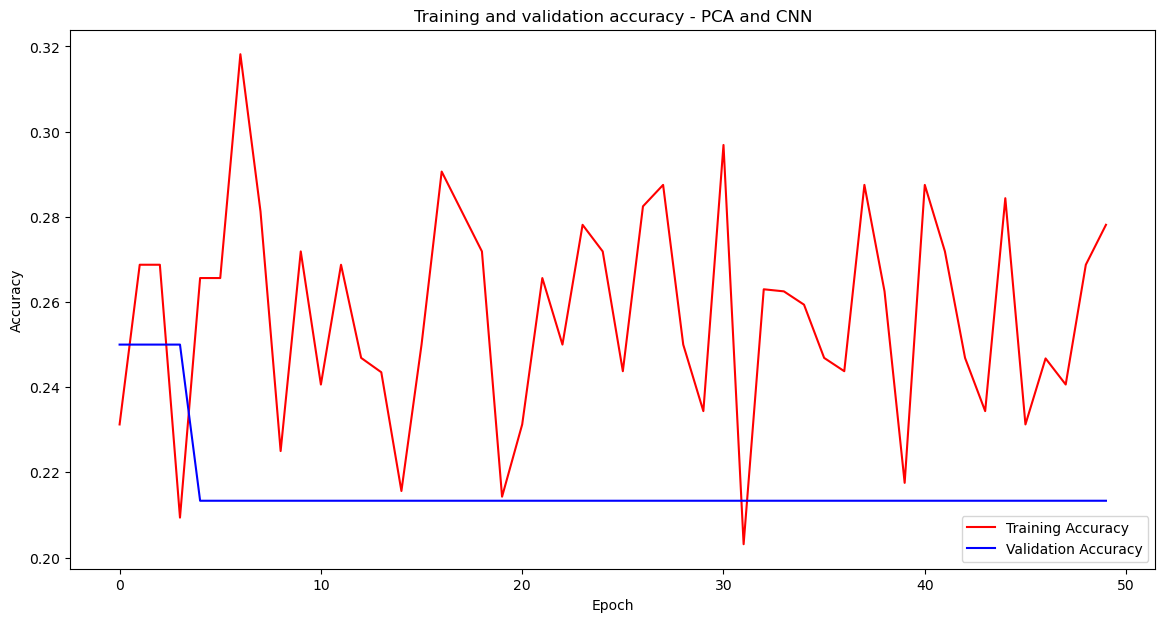

In [32]:
acc=model_pca_fit.history['accuracy']
val_acc=model_pca_fit.history['val_accuracy']
loss=model_pca_fit.history['loss']
val_loss=model_pca_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - PCA and CNN')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss - PCA and CNN')

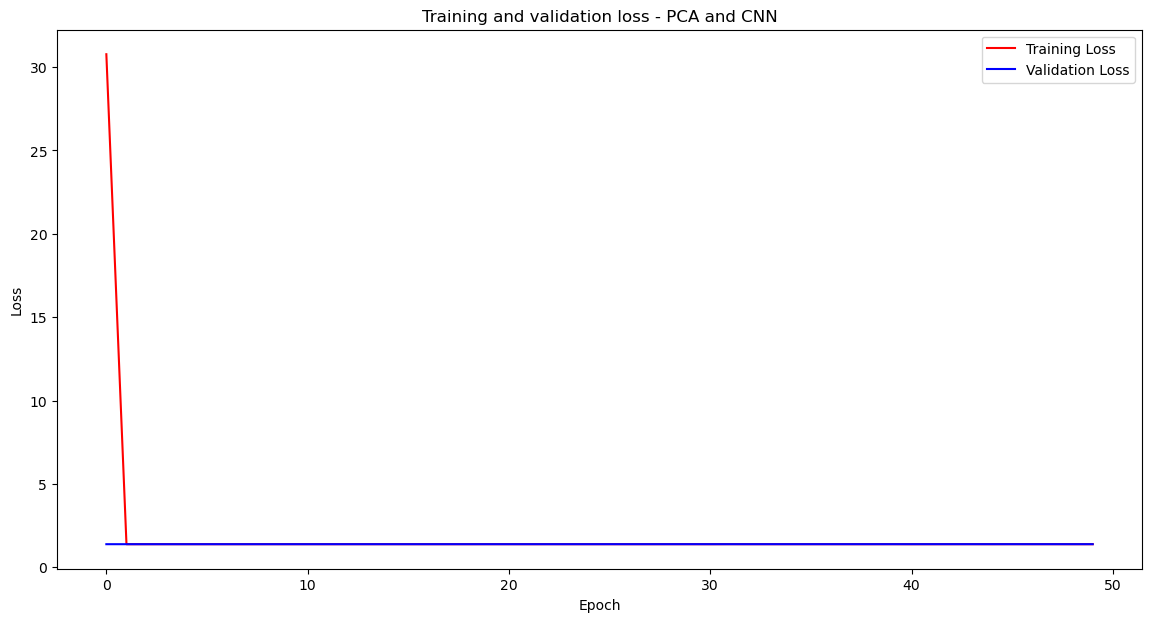

In [33]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - PCA and CNN')
     

# 4.3.1. Train, Validation, and Testing Split (PCA X)

In [16]:
# pip install split-folders

In [72]:
# Do not run

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output= output_folder, 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None) # default values

Copying files: 3000 files [00:04, 674.31 files/s]


# 4.2.2. Images Rescaling and Formatting

In [34]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [35]:
train_dataset = train.flow_from_directory(train_folder,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

validation_dataset = validation.flow_from_directory(validation_folder,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')
test_dataset = test.flow_from_directory(test_folder,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 2100 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 300 images belonging to 4 classes.


In [36]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

In [37]:
train_dataset.class_indices

{'angry': 0, 'happy': 1, 'relaxed': 2, 'sad': 3}

# 4.3.2.2.3. Training and Validation - Model 1: Simple CNN

In [38]:
num_classes = 4

model_cnn = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    #
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    ##
                                    tf.keras.layers.Dense(num_classes,activation='softmax') # num of classes
                                    ])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 64)       

In [39]:
from tensorflow.keras.optimizers import RMSprop

model_cnn.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(learning_rate=0.001),
              optimizer = 'Adam',
              metrics=['accuracy'])


In [123]:
model_cnn_fit = model_cnn.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )

Epoch 1/50
5/5 [==============================] - 14s 3s/step - loss: 5.0239 - accuracy: 0.3313 - val_loss: 1.5123 - val_accuracy: 0.2633
Epoch 2/50
5/5 [==============================] - 11s 2s/step - loss: 1.5521 - accuracy: 0.2688 - val_loss: 1.3897 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 11s 2s/step - loss: 1.3892 - accuracy: 0.3446 - val_loss: 1.3933 - val_accuracy: 0.2900
Epoch 4/50
5/5 [==============================] - 12s 3s/step - loss: 1.3940 - accuracy: 0.2625 - val_loss: 1.3849 - val_accuracy: 0.2667
Epoch 5/50
5/5 [==============================] - 12s 3s/step - loss: 1.3822 - accuracy: 0.3063 - val_loss: 1.3891 - val_accuracy: 0.2500
Epoch 6/50
5/5 [==============================] - 11s 2s/step - loss: 1.3866 - accuracy: 0.3108 - val_loss: 1.3844 - val_accuracy: 0.3083
Epoch 7/50
5/5 [==============================] - 12s 3s/step - loss: 1.3832 - accuracy: 0.2688 - val_loss: 1.3836 - val_accuracy: 0.2550
Epoch 8/50
5/5 [==================

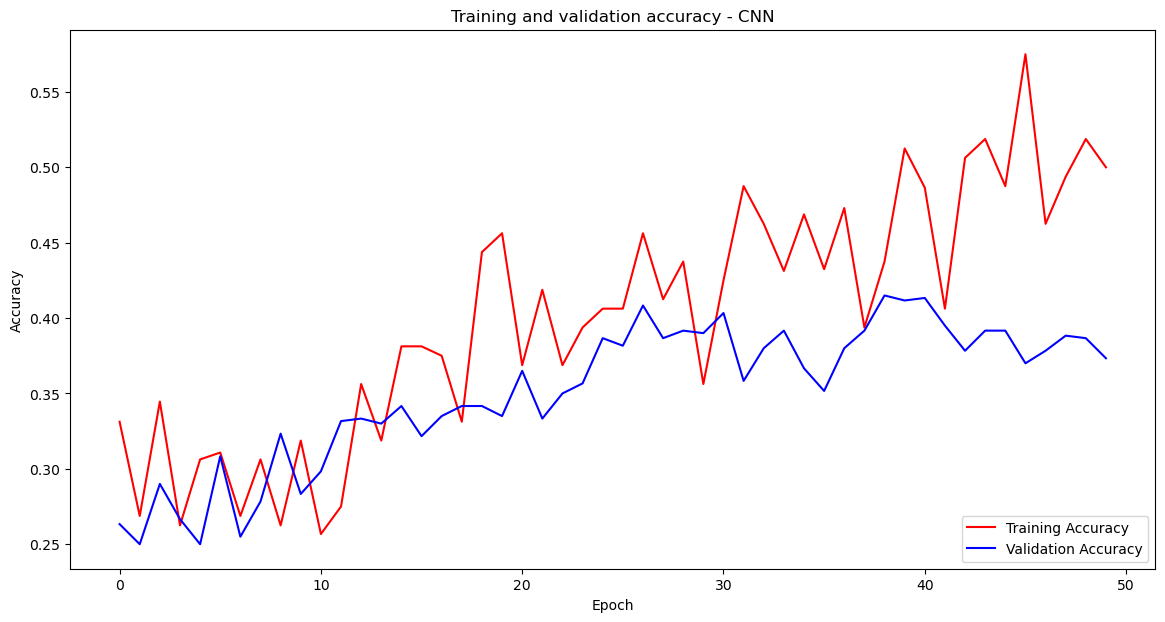

In [124]:
acc=model_cnn_fit.history['accuracy']
val_acc=model_cnn_fit.history['val_accuracy']
loss=model_cnn_fit.history['loss']
val_loss=model_cnn_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - CNN')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss - CNN')

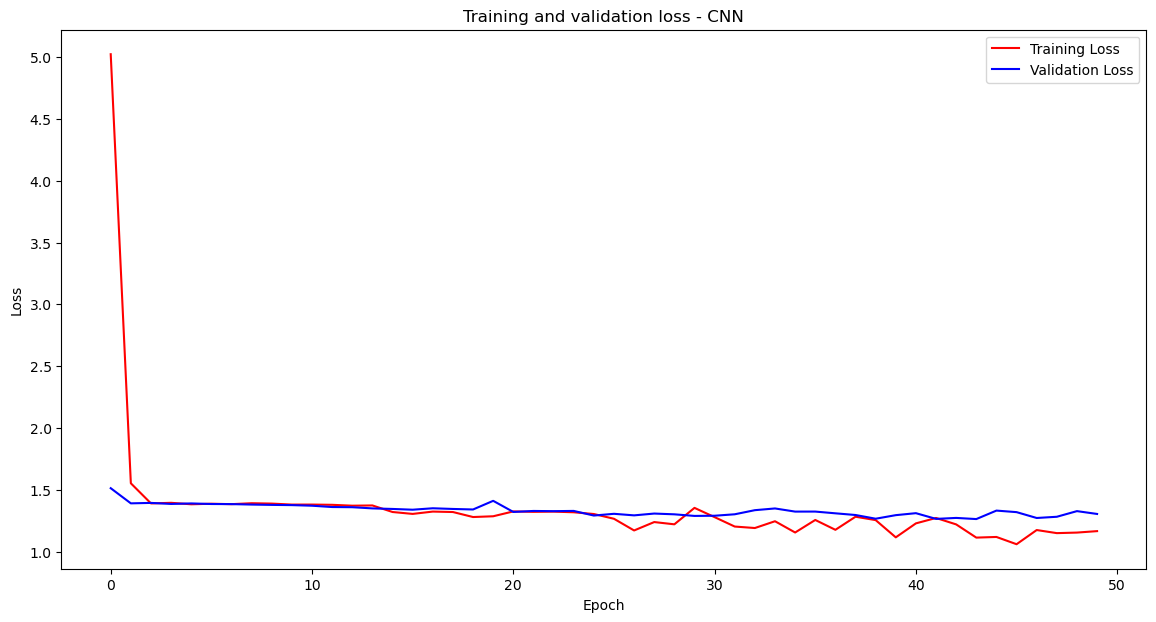

In [125]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - CNN')
     

# 4.3.3.	Training Model 2: Interception V3 Algorithm

In [40]:
### Model 2

num_classes = 4

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

# Define the new model
model_inc = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with appropriate loss and optimizer functions
model_inc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_inc.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_10[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_12[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_16[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_25 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_28 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_7[0][0]']        
                                                                                                  
 conv2d_39 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_39[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_49 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_49[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_50 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_60 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_75 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_79 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_75[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_79[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_81[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [41]:
model_inc_fit = model_inc.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )

Epoch 1/50
5/5 [==============================] - 44s 9s/step - loss: 2.3994 - accuracy: 0.3375 - val_loss: 1.7457 - val_accuracy: 0.4083
Epoch 2/50
5/5 [==============================] - 34s 8s/step - loss: 1.7289 - accuracy: 0.4000 - val_loss: 1.2943 - val_accuracy: 0.4617
Epoch 3/50
5/5 [==============================] - 35s 8s/step - loss: 1.4223 - accuracy: 0.4875 - val_loss: 1.1846 - val_accuracy: 0.5400
Epoch 4/50
5/5 [==============================] - 34s 8s/step - loss: 1.2135 - accuracy: 0.4875 - val_loss: 1.2023 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 35s 8s/step - loss: 1.1887 - accuracy: 0.5375 - val_loss: 1.2378 - val_accuracy: 0.5400
Epoch 6/50
5/5 [==============================] - 40s 10s/step - loss: 1.2248 - accuracy: 0.5562 - val_loss: 0.9648 - val_accuracy: 0.5933
Epoch 7/50
5/5 [==============================] - 43s 10s/step - loss: 0.9796 - accuracy: 0.5813 - val_loss: 0.8974 - val_accuracy: 0.6467
Epoch 8/50
5/5 [================

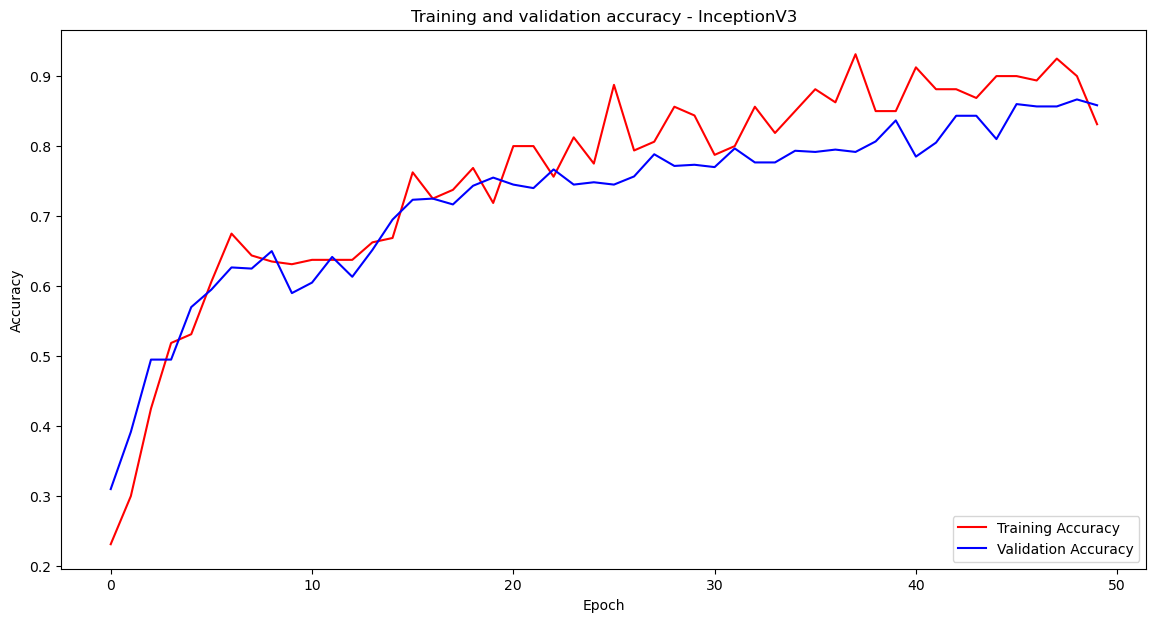

In [111]:
acc=model_inc_fit.history['accuracy']
val_acc=model_inc_fit.history['val_accuracy']
loss=model_inc_fit.history['loss']
val_loss=model_inc_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - InceptionV3')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss - InceptionV3')

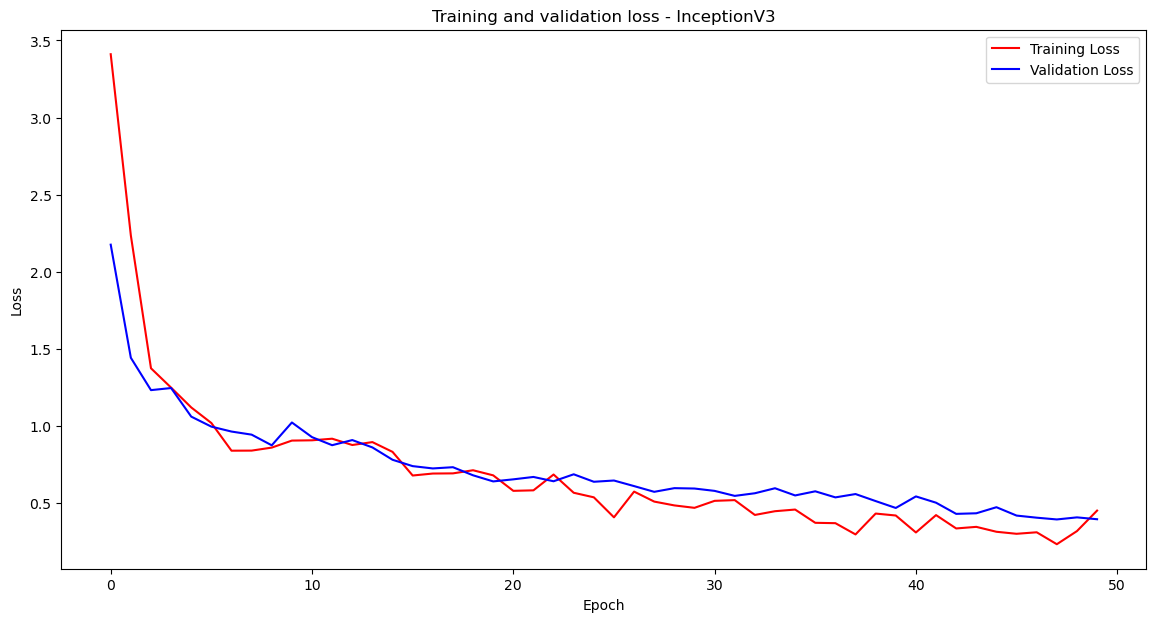

In [112]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - InceptionV3')
     

# 4.3.4.	Training Model 3: AlexNet

In [87]:
num_classes = 4

model_alexnet = tf.keras.models.Sequential([
    # 1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # 2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # 3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),

    # 4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),

    # 5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # 1st Dense Layer
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    # 2nd Dense Layer
    tf.keras.layers.Dense(units=4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    # Output Softmax Layer
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

model_alexnet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                      

In [91]:
model_alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_alexnet_fit = model_alexnet.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )


Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 15.6668 - accuracy: 0.2230 - val_loss: 18.1484 - val_accuracy: 0.2500
Epoch 2/50
5/5 [==============================] - 11s 2s/step - loss: 9.5327 - accuracy: 0.2812 - val_loss: 63.0953 - val_accuracy: 0.2500
Epoch 3/50
5/5 [==============================] - 11s 2s/step - loss: 6.5021 - accuracy: 0.2365 - val_loss: 96.0782 - val_accuracy: 0.2467
Epoch 4/50
5/5 [==============================] - 12s 3s/step - loss: 4.5972 - accuracy: 0.3187 - val_loss: 89.5906 - val_accuracy: 0.2467
Epoch 5/50
5/5 [==============================] - 12s 3s/step - loss: 3.5450 - accuracy: 0.2875 - val_loss: 26.1564 - val_accuracy: 0.2633
Epoch 6/50
5/5 [==============================] - 12s 3s/step - loss: 2.9646 - accuracy: 0.2562 - val_loss: 45.3330 - val_accuracy: 0.2817
Epoch 7/50
5/5 [==============================] - 12s 3s/step - loss: 2.5039 - accuracy: 0.2875 - val_loss: 11.5853 - val_accuracy: 0.2900
Epoch 8/50
5/5 [==========

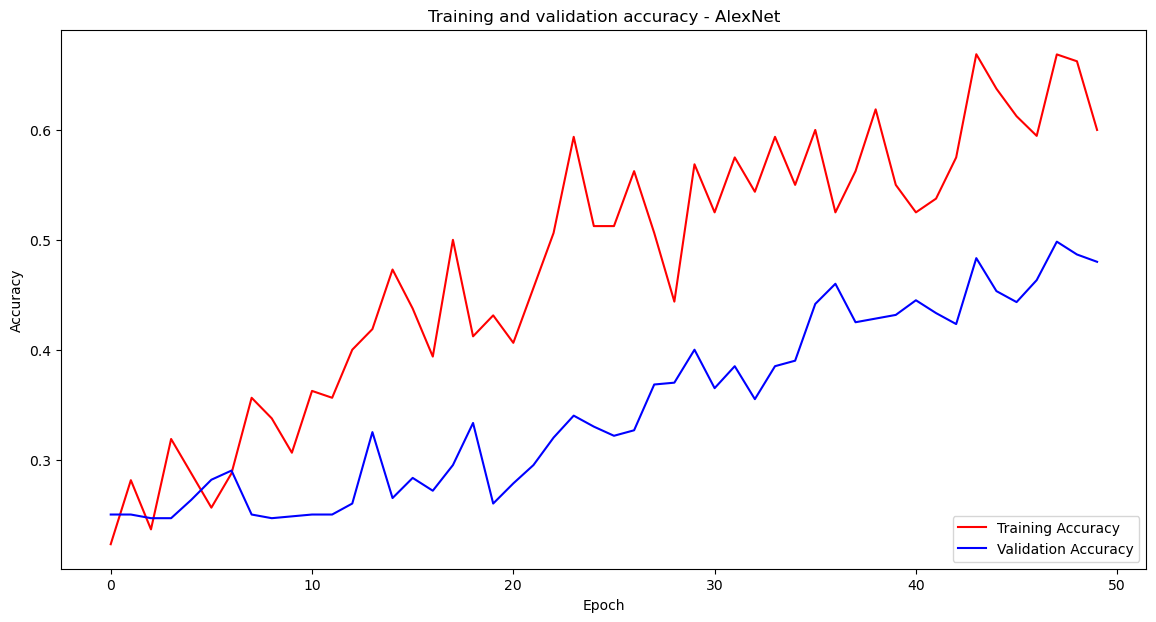

In [92]:
acc=model_alexnet_fit.history['accuracy']
val_acc=model_alexnet_fit.history['val_accuracy']
loss=model_alexnet_fit.history['loss']
val_loss=model_alexnet_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - AlexNet')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss - AlexNet')

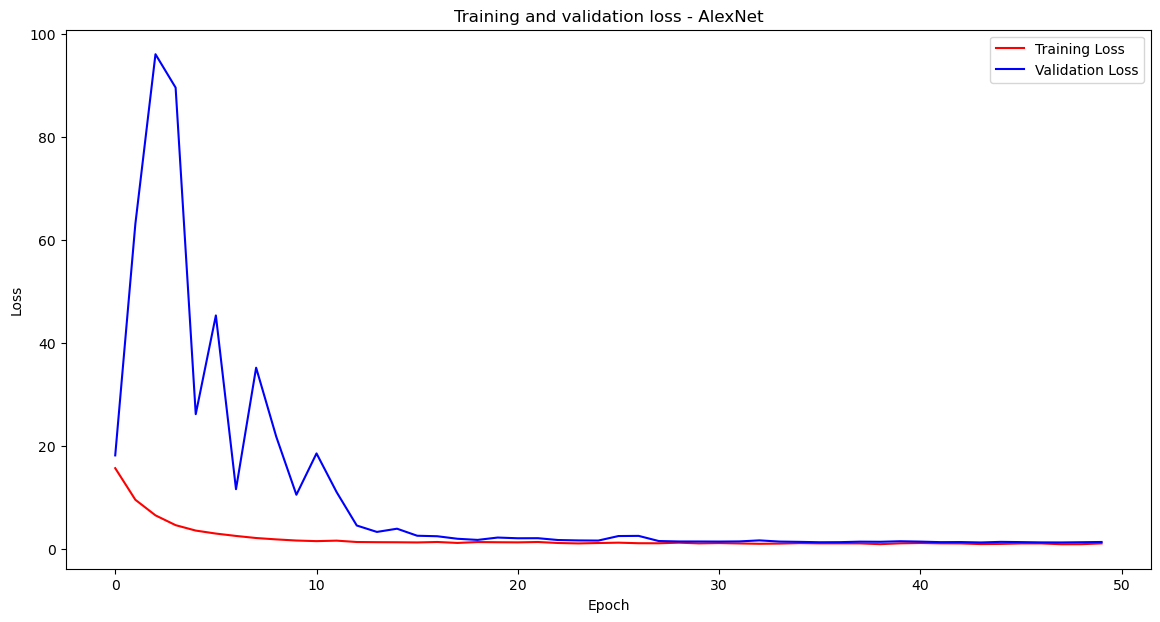

In [93]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - AlexNet')
     

# 4.3.5.	Training Model 4: OverFeat

In [94]:
num_classes = 4

model_overfeat = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional layer
    tf.keras.layers.Conv2D(256, (5,5), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional layer
    tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional layer
    tf.keras.layers.Conv2D(1024, (3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),

    # Fifth convolutional layer
    tf.keras.layers.Conv2D(1024, (3,3), strides=(1,1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    # Flatten and fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3072, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_overfeat.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                      

In [95]:
model_overfeat.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_overfeat_fit = model_overfeat.fit(train_dataset,
                     steps_per_epoch = 5,
                      epochs = 50,
                      validation_data = validation_dataset
                     )


Epoch 1/50
5/5 [==============================] - 38s 8s/step - loss: 20.8157 - accuracy: 0.3063 - val_loss: 66.5508 - val_accuracy: 0.2467
Epoch 2/50
5/5 [==============================] - 37s 8s/step - loss: 22.0294 - accuracy: 0.3063 - val_loss: 156.1477 - val_accuracy: 0.2767
Epoch 3/50
5/5 [==============================] - 39s 9s/step - loss: 22.4768 - accuracy: 0.2438 - val_loss: 318.5800 - val_accuracy: 0.2650
Epoch 4/50
5/5 [==============================] - 52s 12s/step - loss: 19.9824 - accuracy: 0.3438 - val_loss: 379.5580 - val_accuracy: 0.2633
Epoch 5/50
5/5 [==============================] - 49s 11s/step - loss: 16.4121 - accuracy: 0.2875 - val_loss: 653.9853 - val_accuracy: 0.2500
Epoch 6/50
5/5 [==============================] - 38s 9s/step - loss: 13.1074 - accuracy: 0.2500 - val_loss: 252.8627 - val_accuracy: 0.2550
Epoch 7/50
5/5 [==============================] - 46s 10s/step - loss: 10.9597 - accuracy: 0.3875 - val_loss: 344.1298 - val_accuracy: 0.2500
Epoch 8/50


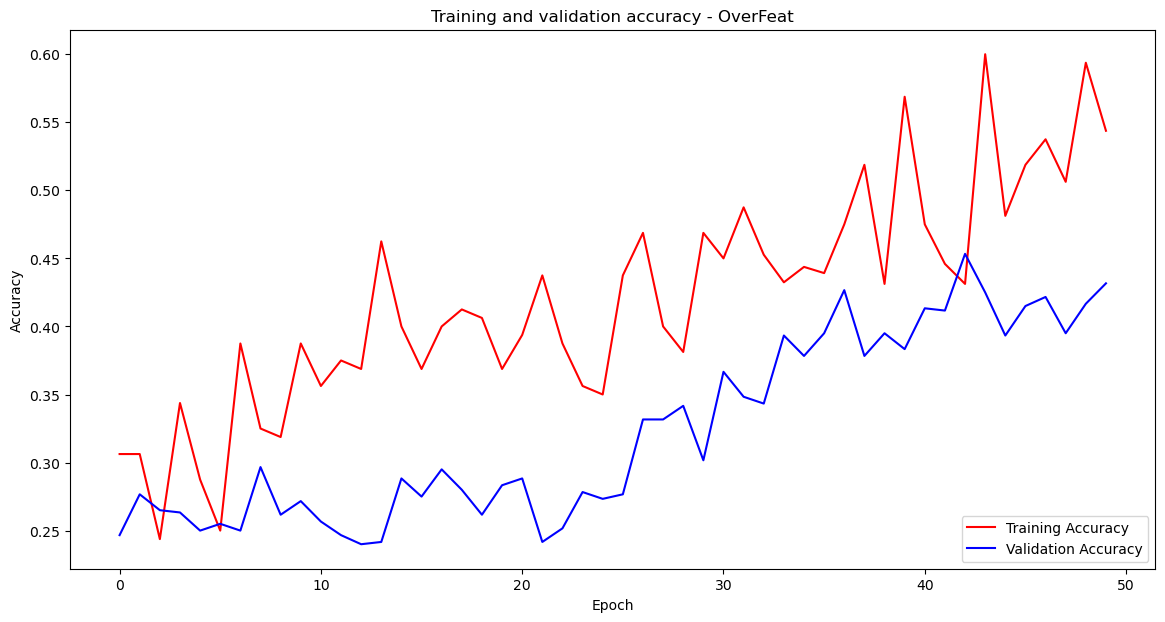

In [96]:
acc=model_overfeat_fit.history['accuracy']
val_acc=model_overfeat_fit.history['val_accuracy']
loss=model_overfeat_fit.history['loss']
val_loss=model_overfeat_fit.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy - OverFeat')
plt.legend(loc='lower right')
plt.show()


Text(0.5, 1.0, 'Training and validation loss - OverFeat')

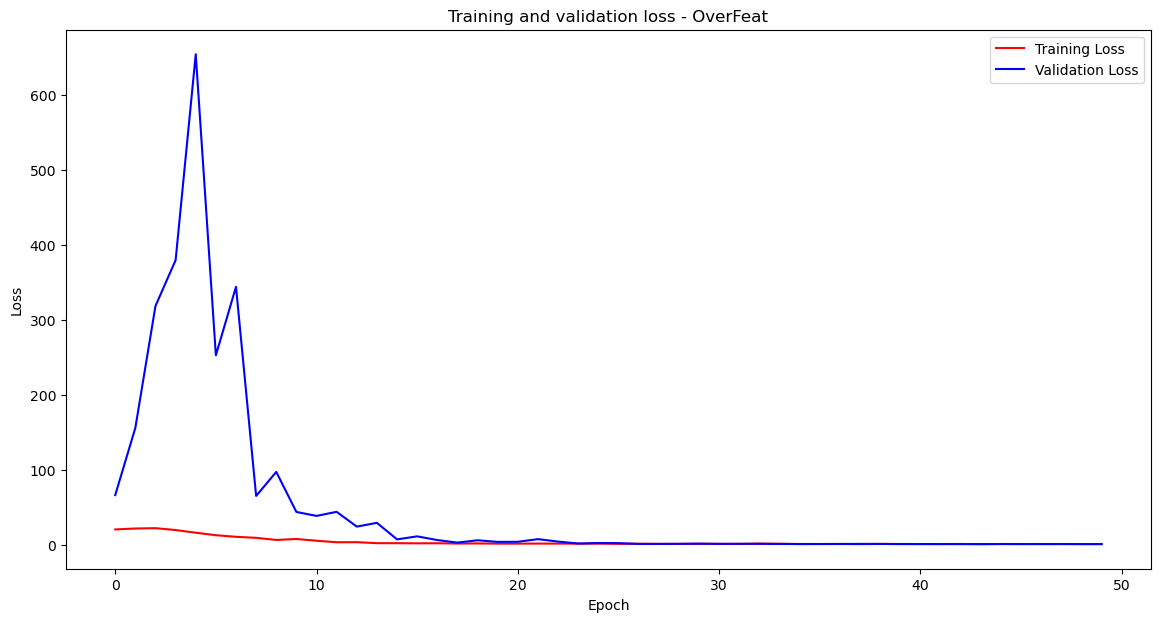

In [97]:

fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss - OverFeat')
     

------------
# 4.3.6.	Testing

In [130]:
test_loss, test_acc = model_cnn.evaluate(test_dataset)

print('Test accuracy:', test_acc)


10/10 [==============================] - 2s 199ms/step - loss: 1.2750 - accuracy: 0.3867
Test accuracy: 0.3866666555404663


In [116]:
test_loss, test_acc = model_inc.evaluate(test_dataset)

print('Test accuracy:', test_acc)


10/10 [==============================] - 8s 749ms/step - loss: 0.4455 - accuracy: 0.8333
Test accuracy: 0.8333333134651184


In [100]:
test_loss, test_acc = model_alexnet.evaluate(test_dataset)

print('Test accuracy:', test_acc)


10/10 [==============================] - 3s 232ms/step - loss: 1.2707 - accuracy: 0.5000
Test accuracy: 0.5


In [101]:
test_loss, test_acc = model_overfeat.evaluate(test_dataset)

print('Test accuracy:', test_acc)


10/10 [==============================] - 8s 700ms/step - loss: 1.4923 - accuracy: 0.4133
Test accuracy: 0.41333332657814026


# 4.4.1.	Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions for the test data
y_pred = model_inc.predict_generator(test_dataset, steps=len(test_dataset), verbose=1)

# Convert the predictions from one-hot encoding to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels from the test dataset
y_true_labels = test_dataset.classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

print(cm)


C:\Users\user\AppData\Local\Temp\ipykernel_17656\2557314509.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model_inc.predict_generator(test_dataset, steps=len(test_dataset), verbose=1)


10/10 [==============================] - 17s 2s/step
[[18 21 14 22]
 [18 19 20 18]
 [14 12 26 23]
 [22 14 21 18]]


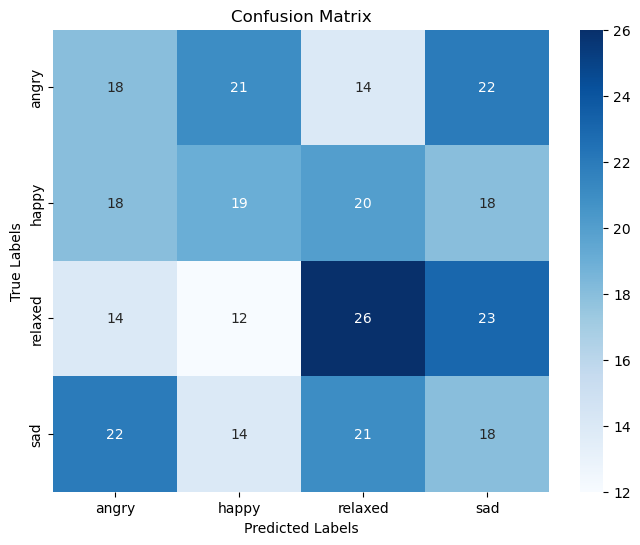

In [43]:
# define class names
class_names = list(test_dataset.class_indices.keys())

# plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 4.4.2.	Receiver Operating Characteristic (ROC)

C:\Users\user\AppData\Local\Temp\ipykernel_17656\3933040909.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_probs = model_inc.predict_generator(test_dataset, steps=len(test_dataset), verbose=1)


10/10 [==============================] - 14s 1s/step


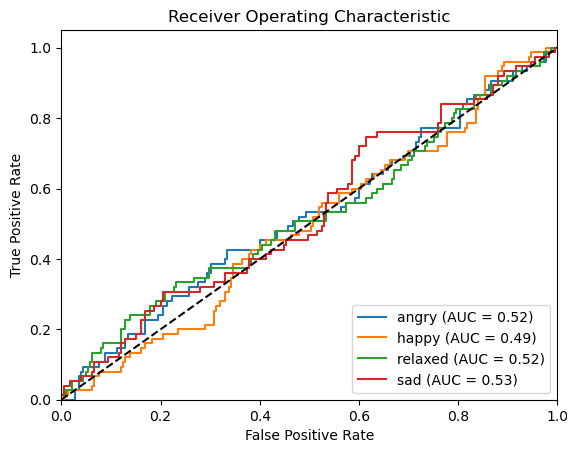

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
class_names = list(test_dataset.class_indices.keys())

# Get the predicted probabilities for each class
y_pred_probs = model_inc.predict_generator(test_dataset, steps=len(test_dataset), verbose=1)

# Get the true labels from the test dataset
y_true_labels = test_dataset.classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_labels, y_pred_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Image prediction result
# 4.4.3.	Misclassification Sample Images

1/1 [==============================] - 0s 206ms/step


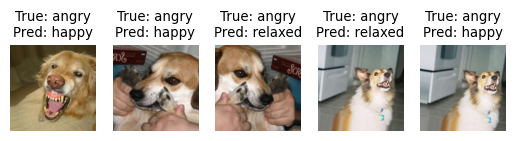

In [57]:
import os
import numpy as np
import keras.utils as image
import matplotlib.pyplot as plt

dir_path = test_folder

# create a figure and an array of subplots with 1 row and 5 columns
fig, axs = plt.subplots(1, 5)

# set the font size for the titles
plt.rcParams.update({'font.size': 8})

# initialize a counter for the subplots
i = 0

for subdir, dirs, files in os.walk(dir_path):
    for file in files:
        # check if the file is an image
        if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
            # read and preprocess the image
            img = image.load_img(os.path.join(subdir, file), target_size=(224, 224))
            X = image.img_to_array(img)
            X = np.expand_dims(X, axis=0)
            images = np.vstack([X])
            # make predictions using the model
            val = model_inc.predict(images)
            pred_class = np.argmax(val, axis=1)
            if pred_class == 0:
                pred_class_name = "angry"
            elif pred_class == 1:
                pred_class_name = "happy"
            elif pred_class == 2:
                pred_class_name = "relaxed"
            elif pred_class == 3:
                pred_class_name = "sad"
            else:
                pred_class_name = "unknown"
            # get the true class name from the subdirectory
            true_class_name = subdir.split("/")[-1]
            # plot the image with its predicted and true labels in the subplot
            axs[i].imshow(img)
            axs[i].axis("off")
            axs[i].set_title("True: {}\nPred: {}".format(true_class_name, pred_class_name))
            
            # increment the counter for the subplots
            i += 1
            
            # stop after plotting 5 images
            if i >= 5:
                break
    
    # stop after plotting 5 images
    if i >= 5:
        break

# show the plot
plt.show()


In [58]:
# dir_path = test_folder

# for subdir, dirs, files in os.walk(dir_path):
#     for file in files:
#         # check if the file is an image
#         if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
#             # read and preprocess the image
#             img = image.load_img(os.path.join(subdir, file), target_size=(224, 224))
#             X = image.img_to_array(img)
#             X = np.expand_dims(X, axis=0)
#             images = np.vstack([X])
#             # make predictions using the model
#             val = model_inc.predict(images)
#             pred_class = np.argmax(val, axis=1)
#             if pred_class == 0:
#                 pred_class_name = "angry"
#             elif pred_class == 1:
#                 pred_class_name = "happy"
#             elif pred_class == 2:
#                 pred_class_name = "relaxed"
#             elif pred_class == 3:
#                 pred_class_name = "sad"
#             else:
#                 pred_class_name = "unknown"
#             # get the true class name from the subdirectory
#             true_class_name = subdir.split("/")[-1]
#             # plot the image with its predicted and true labels
#             plt.imshow(img)
#             plt.axis("off")
#             plt.title("True: {}\nPred: {}".format(true_class_name, pred_class_name))
#             plt.show()
